In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('csv_files/advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

#### Since we have target variable which we want predict with examples, so it is a supervised learning problem
#### It is a regression problem 

## Step1: Split our data into train and test sets

In [7]:
df_train,df_test = train_test_split(df,test_size=0.3)


In [9]:
df_train.shape

(140, 4)

In [10]:
df_test.shape

(60, 4)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

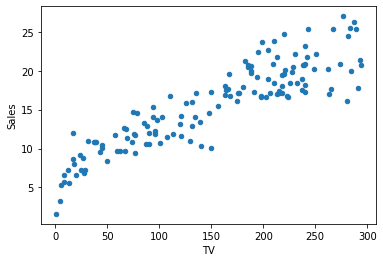

In [12]:
df_train[['TV','Sales']].plot.scatter(x='TV',y='Sales')


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

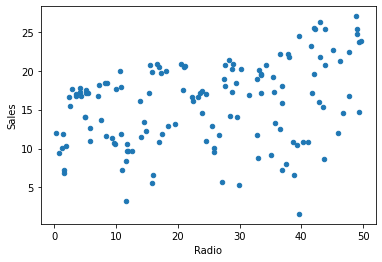

In [13]:
df_train[['Radio','Sales']].plot.scatter(x='Radio',y='Sales')


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

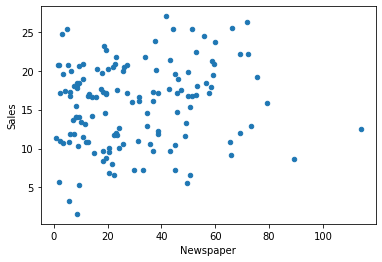

In [14]:
df_train[['Newspaper','Sales']].plot.scatter(x='Newspaper',y='Sales')


In [15]:
df_train.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.044066,0.035838,0.895648
Radio,0.044066,1.000000,0.360160,0.345526
Newspaper,0.035838,0.360160,1.000000,0.138600
Sales,0.895648,0.345526,0.138600,1.000000


In [17]:
model = LinearRegression()

In [18]:
model = model.fit(df_train[['TV','Radio','Newspaper']],df_train['Sales'])

In [20]:
model.coef_

array([ 0.05533285,  0.11128139, -0.00095862])

In [21]:
model.intercept_

4.563586154845217

In [24]:
model.score(df_train[['TV','Radio','Newspaper']],df_train['Sales'])

0.8960526635037722

In [25]:
model.score(df_test[['TV','Radio','Newspaper']],df_test['Sales'])

0.9084598028837515

In [26]:
model.feature_names_in_

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [29]:
test_predicted_sales = model.predict(df_test[['TV','Radio','Newspaper']])

In [31]:
test_actual_sales = df_test['Sales'].values

In [32]:
test_predicted_sales

array([11.83038283, 21.41892629,  5.27218095, 13.83270188, 13.26624805,
       15.71911633, 20.78573423, 21.32417212, 15.21350904, 10.41474555,
        7.07581316, 21.14008722, 12.45823986, 12.20006856, 17.83620491,
        5.30841838, 14.81548839, 10.08010252, 17.30088396,  8.99246129,
       10.65634505,  8.27912517, 24.90703222, 21.17127783,  7.9703355 ,
        8.7708642 ,  5.94127249, 21.93204519,  9.88599754,  8.05483622,
        7.86856942,  7.72594187, 15.3201707 , 17.23541042, 17.48635491,
       21.68379261,  6.92238357, 23.72133835, 16.09326605, 10.31116618,
       12.67925588, 18.42383436, 16.9214086 , 18.94846826, 21.34410819,
       11.81691916, 15.14637222, 15.88809812, 12.56341253, 20.10741319,
       15.93089333, 10.95272952, 17.23848877, 10.95800675, 20.9485981 ,
       10.21147585, 14.22060972, 12.49071014, 21.48533088, 15.38628207])

In [33]:
test_actual_sales

array([12. , 22.3,  4.8, 12.2, 13.6, 15. , 19.7, 18.9, 15.2,  7.2,  7.6,
       22.6, 11.6, 12.4, 16.9,  5.3, 16.7, 13.2, 15. , 11.9, 11.3,  8.7,
       23.8, 19.8,  7. ,  8.5,  5.9, 20.9, 10.1,  5.5,  7.6,  8.1, 15.5,
       16.5, 16.5, 19.8,  6.7, 24.2, 16.4,  9.5, 11.9, 16. , 17.9, 18.3,
       21.5, 11. , 16. , 15.6, 12.6, 16.8, 16.4, 10.4, 20.2, 11.3, 17.6,
       10.5, 13.2, 10.3, 17.4, 14.8])

In [34]:
mean_squared_error(test_actual_sales,test_predicted_sales)

2.256368978873577

In [35]:
mean_squared_error(test_actual_sales,test_predicted_sales,squared=False)

1.5021214927140805

In [37]:
mean_absolute_error(test_actual_sales,test_predicted_sales)

1.102559467857339